In [19]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [20]:
def get_ghz_circ_static(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        for i in range(num_qubit):
            qc.measure(qr[i],cr2[i])
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

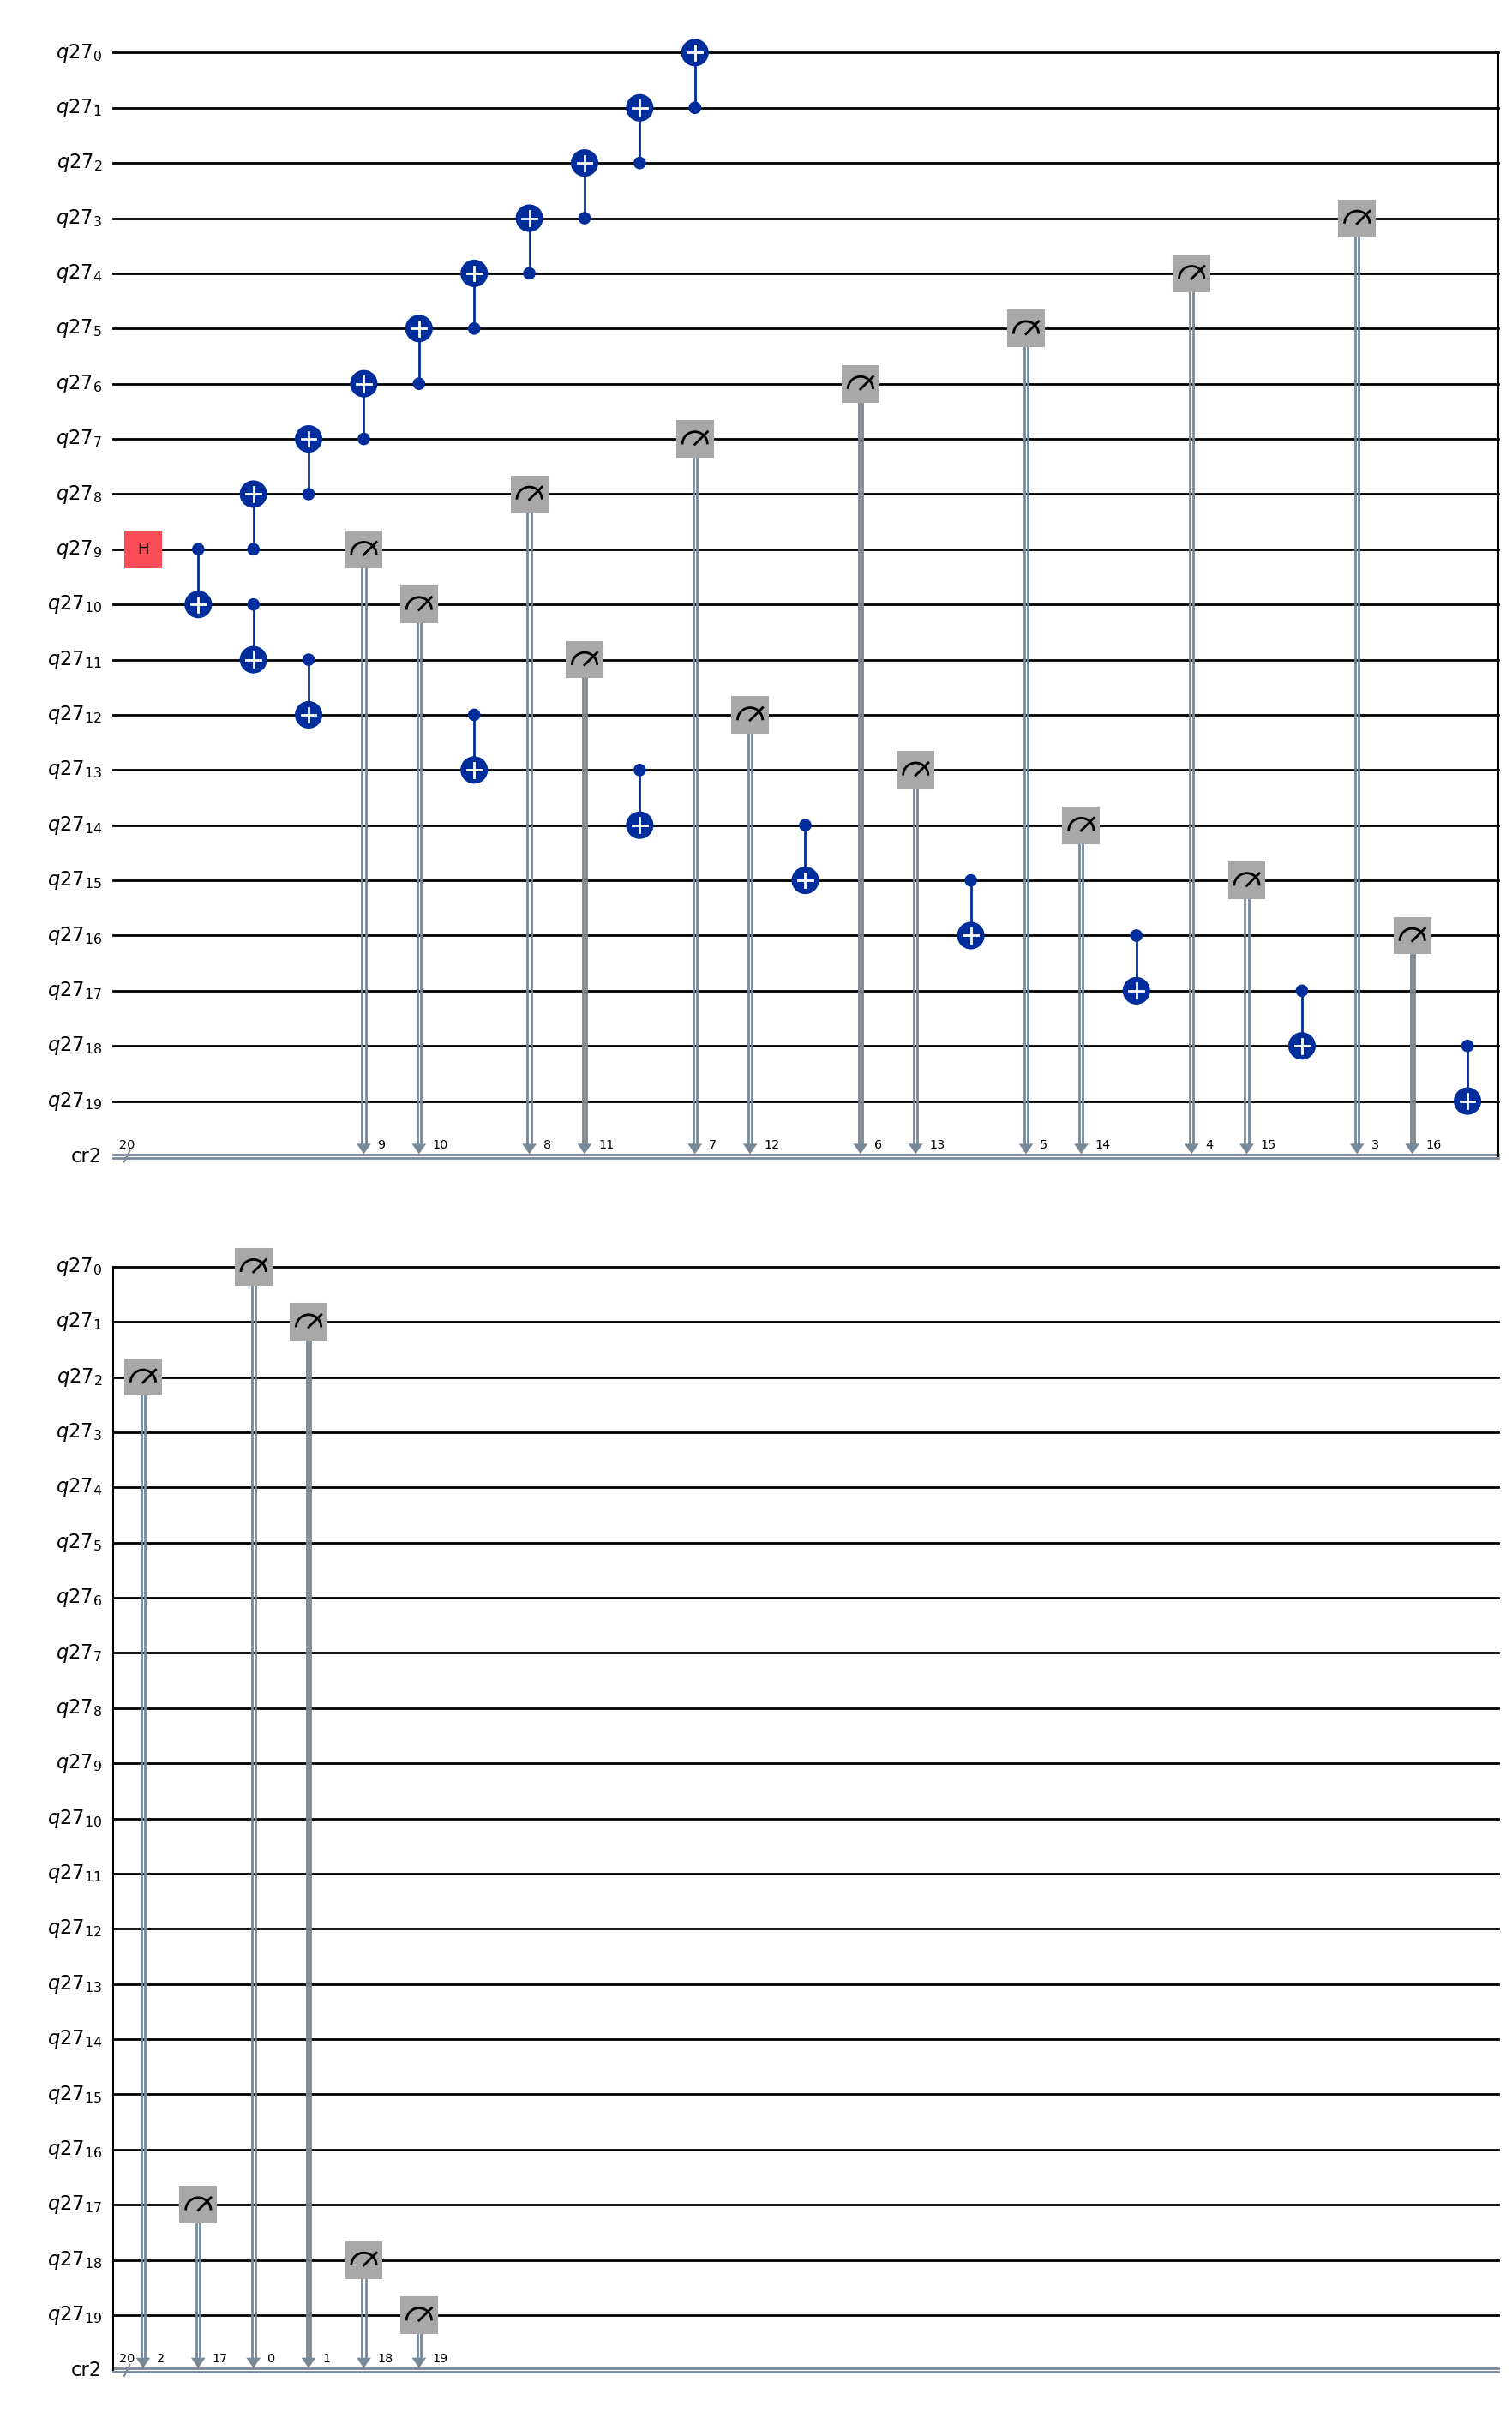

In [21]:
qc = get_ghz_circ_static(num_qubit=20)
qc.draw("mpl")

In [22]:
#qubit-reuse in aersimulator

In [23]:
from qiskit import transpile
from qiskit_aer import AerSimulator

In [24]:
transpiled_qc = transpile(qc, backend=AerSimulator(), init_method="qubit_reuse")

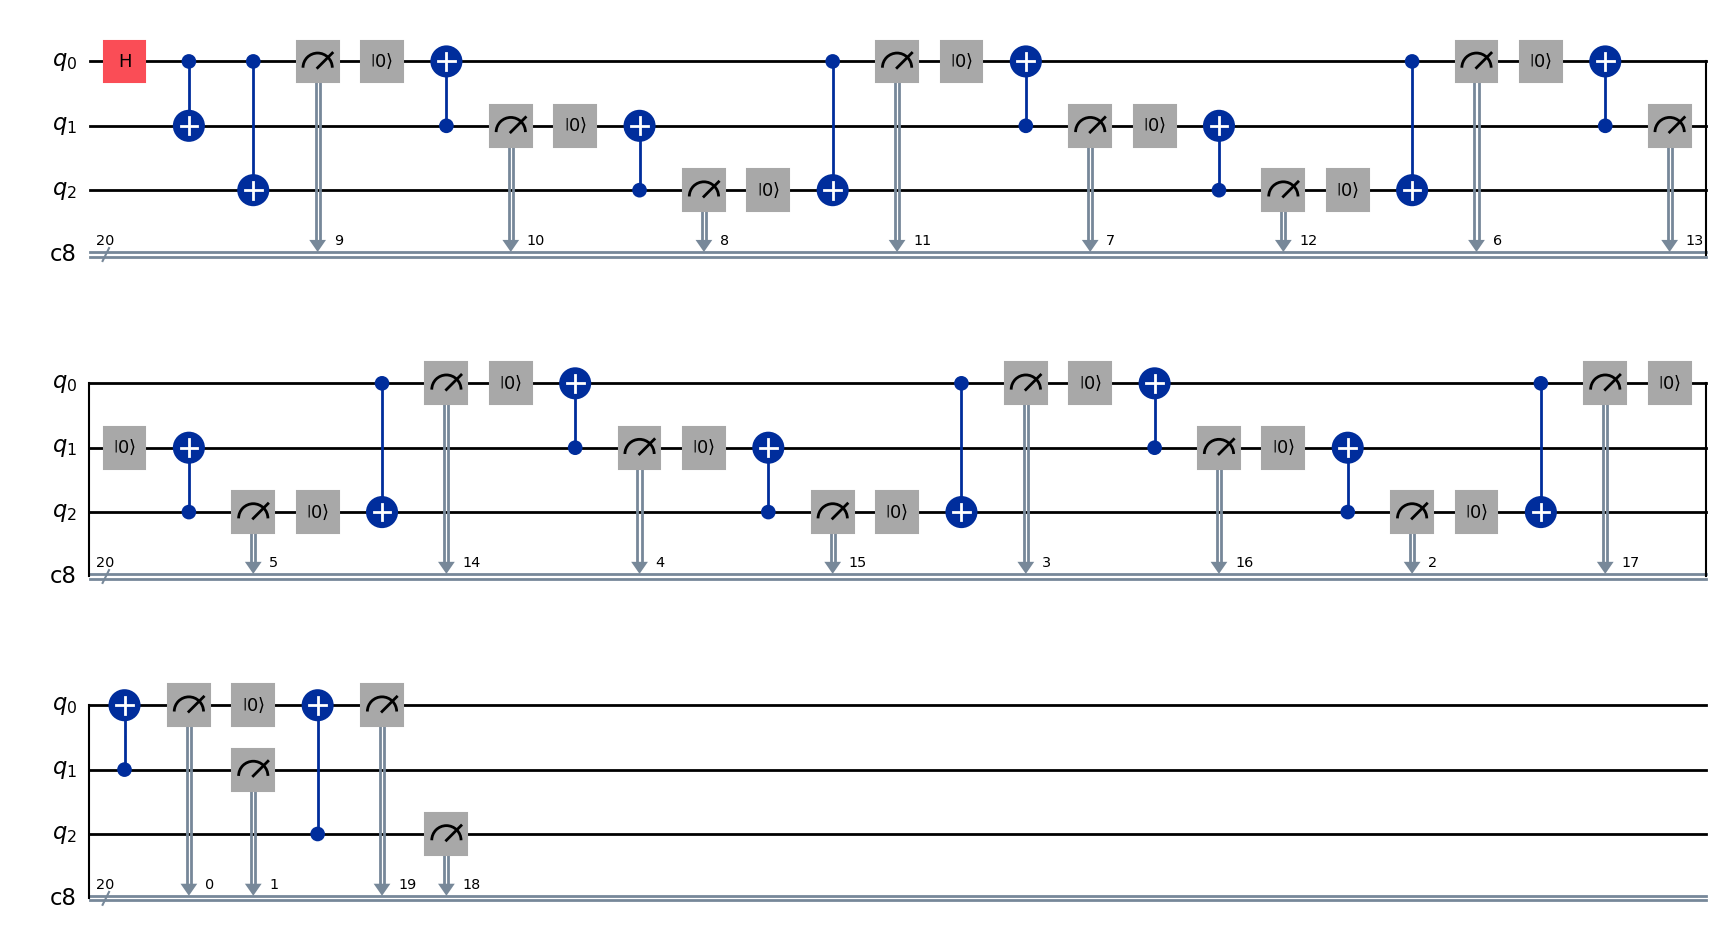

In [25]:
transpiled_qc.draw('mpl')

In [28]:
#transpiling the transpiled_qc on aer simulator
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
transpiled_transpiled_qc = pm.run(transpiled_qc)

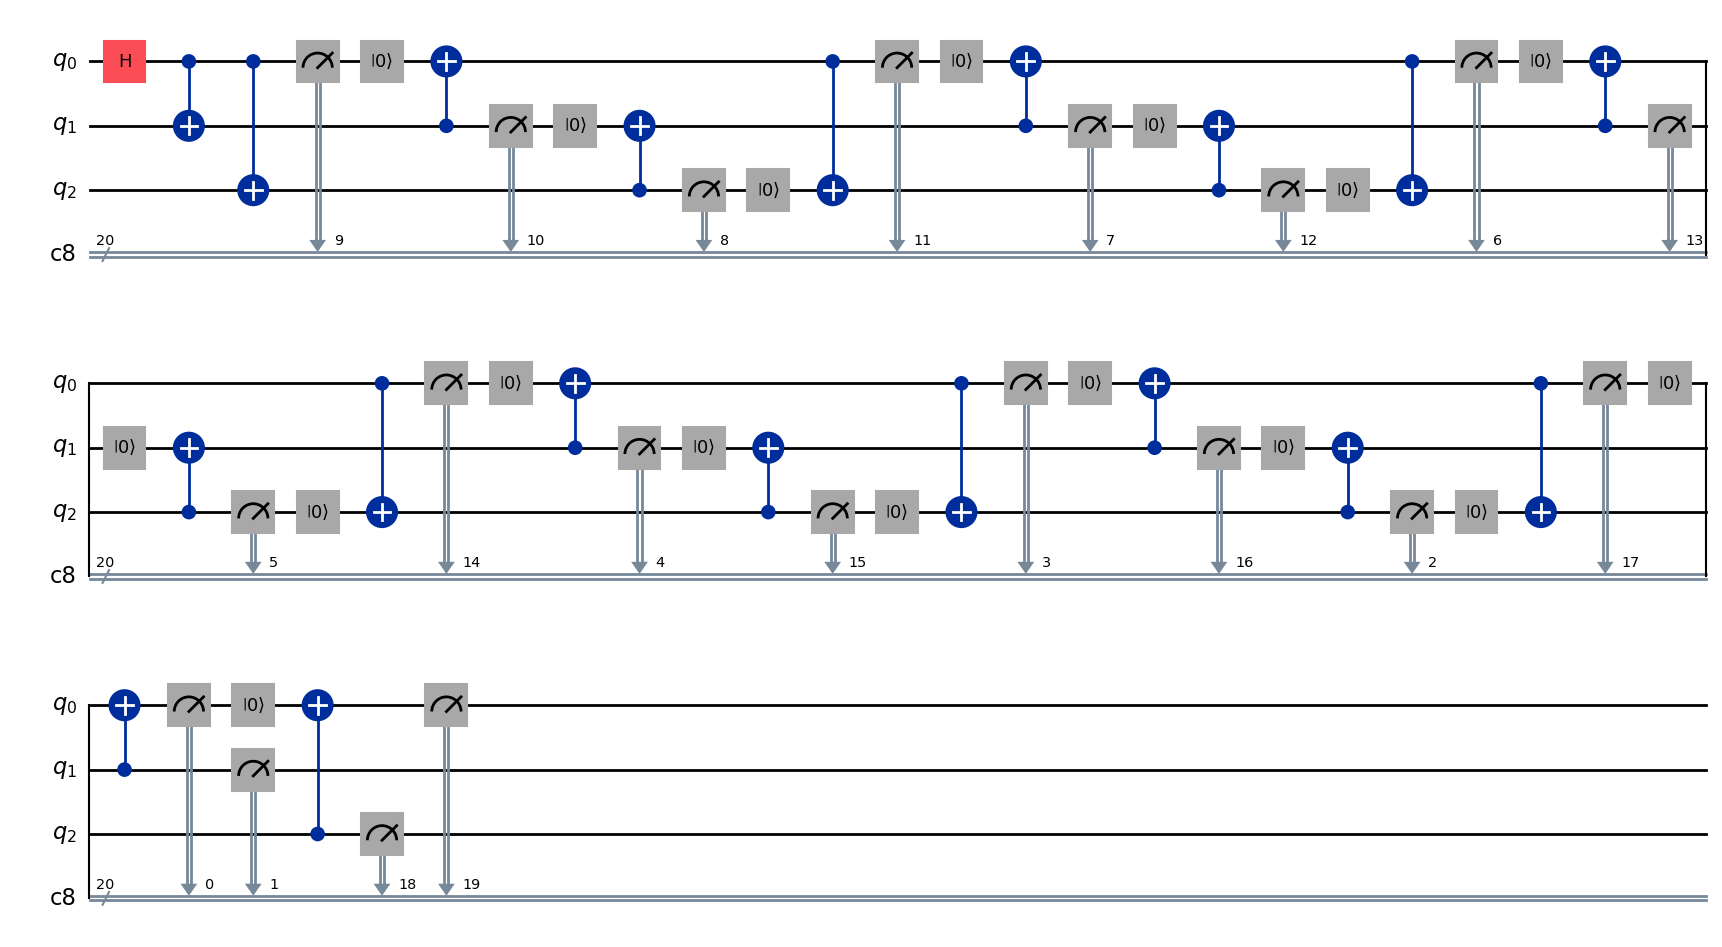

In [29]:
transpiled_transpiled_qc.draw('mpl')

In [12]:
#qubit-reuse in generic backend

In [13]:
from qiskit.providers.fake_provider import GenericBackendV2

In [14]:
transpiled_qc1 = transpile(qc, backend=GenericBackendV2(num_qubits=20), init_method="qubit_reuse")

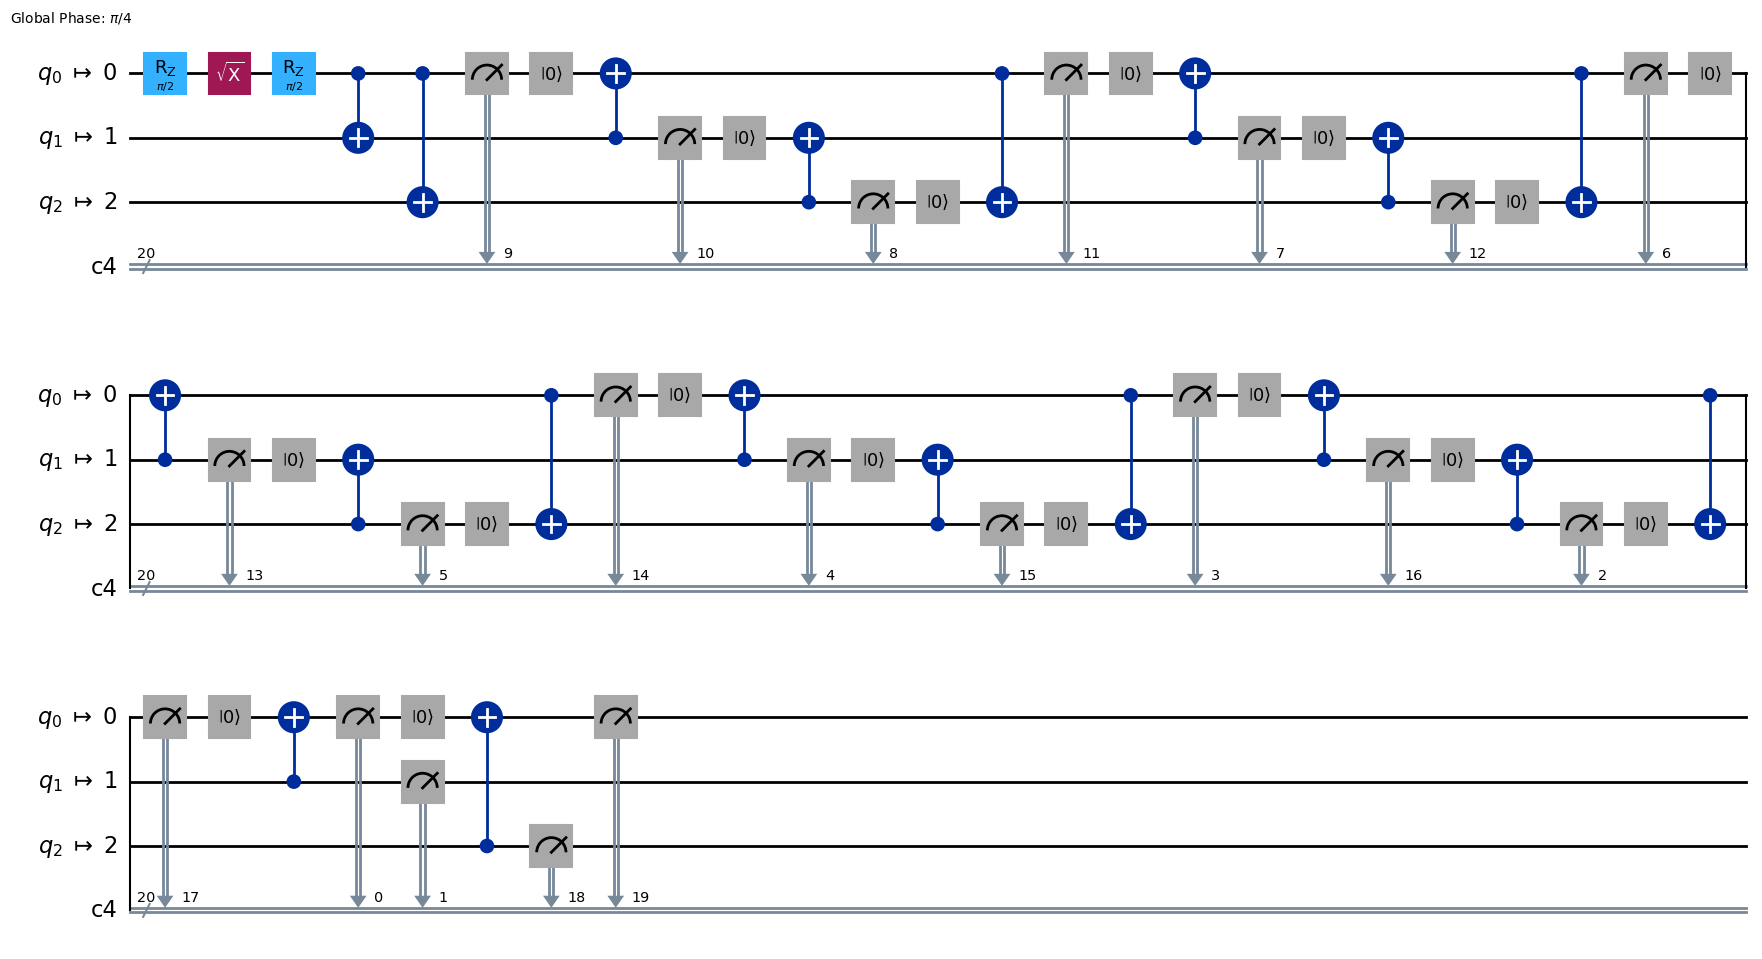

In [15]:
transpiled_qc1.draw('mpl', idle_wires=False)

In [16]:
#qubit-reuse in actual hardware(IBM sherbrooke)

In [17]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import transpile

backend_name = "ibm_sherbrooke"
service = QiskitRuntimeService()
backend = service.get_backend(backend_name)

transpiled_qc2= transpile(qc, backend, init_method="qubit_reuse")

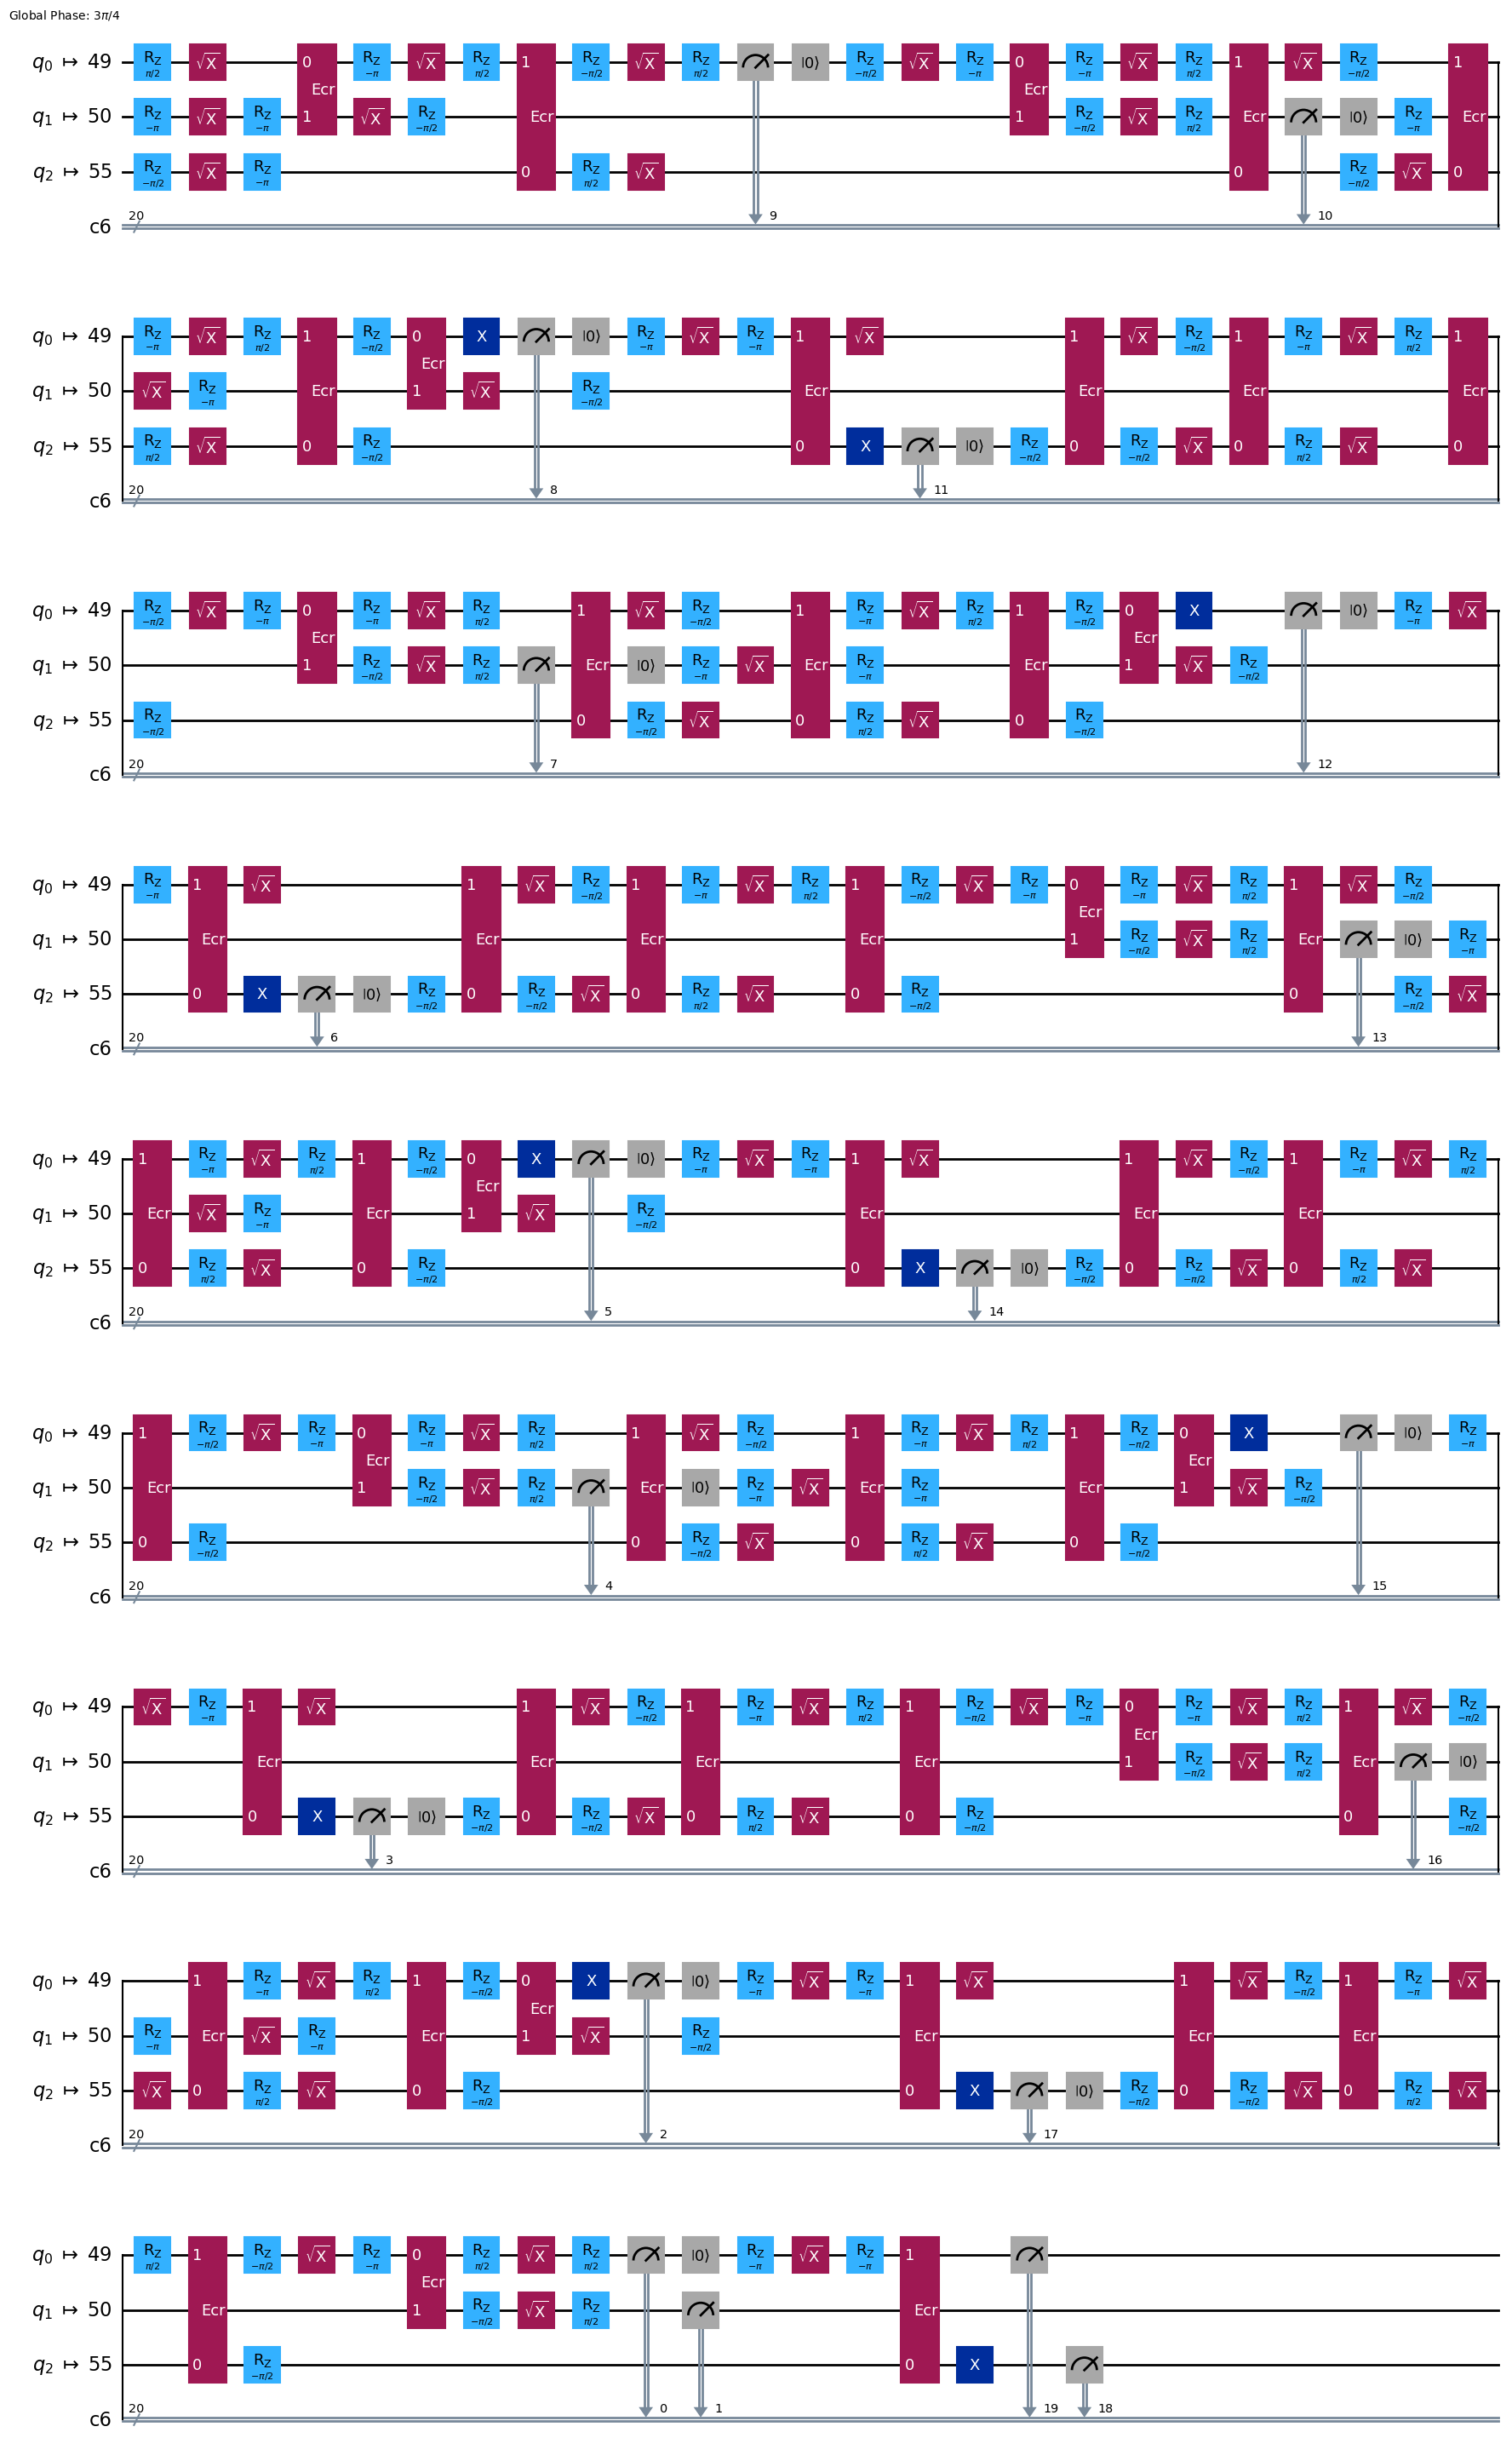

In [18]:
transpiled_qc2.draw('mpl', idle_wires=False)